**TP3**

Done by:

Mathusan Kathirithamby (2113367)

Ali Akbar Sabzi (2078921)

# LOG6308
# TP3 : Systèmes de recommandation et réseaux de neurones

L'objectif du TP3 est de vous familiariser avec la librairie `Tensorflow` et `Tensorflow Recommenders`. Nous souhaitons aussi vous familiariser avec le concept de réseaux neuronaux.
C'est pourquoi nous vous proposons d'effectuer des recommandations de films sur la base de données que vous connaissez bien maintenant : [MovieLens 100k](https://grouplens.org/datasets/movielens/).<br>

Le TP sera noté **sur 100**.

## Critères de correction

- Démarche valide et bien expliquée
- Réponses correctes et commentées
- Présentation soignée 
- Choix de fonctionnalités adéquat
- Interprétation étayée des résultats

## Instructions Globales

Le travail doit être fait en **équipe de deux**.

Vous avez le droit d'utiliser **seulement** les **librairies importées** pour résoudre les **questions 1, 2 et 3**. Si vous utilisez d’autres librairies, vos réponses ne seront pas considérées.

Vous pouvez répondre aux sous-questions en commentaire ou dans des cellules textes en prenant bien soin d’identifier à quelle question vous répondez.
Ceux qui le souhaite peuvent développer en local et écrire votre code dans des fichiers Python en `.py`. Ceci dit, j'attends de vous un README.md m'expliquant comment exécuter votre code avec une liste de dépendances (Requirements).

Pour les questions 1-2-3, le Notebook est suffisant. Vous pouvez marquer vos commentaires et réponses qualitatives dans des cellules textes. 
Par contre, pour la question 4, il est recommandé de fournir un rapport séparé du code en format PDF. Mais, si vous ne souhaitez pas rédiger de rapport, vous pouvez rédiger votre état de l’art et votre démarche dans des cellules textes du Notebook sur Colab.


Pour la remise du travail sur Moodle, on s’attend à un Zip qui contient un notebook en `.ipynb` et/ou des fichiers Python en `.py`. **Si vous décidez** de **rédiger un rapport** pour la **question 4**, vous devez alors aussi **inclure** un fichier **PDF**. 


### Comment télécharger le notebook

- Cliquez sur le menu "Fichier" (*File* en anglais) dans le coin supérieur gauche.
- Une fenêtre popup apparaît, trouvez `Télécharger -> Télécharger le fichier .ipynb` et cliquez dessus.
- 15 avril date limite


#### Installation de tensorflow datasets, tensorflow recommenders, et importation des librairies requises pour le TP

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# pat="/content/drive/MyDrive/LOG6308/tp3"

In [ ]:
!pip install tfds-nightly
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets==4.3
!pip install -q scann

     |████████████████████████████████| 4.3 MB 6.8 MB/s 
     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 462 kB 14.9 MB/s 
     |████████████████████████████████| 3.9 MB 7.5 MB/s 
     |████████████████████████████████| 10.9 MB 6.3 MB/s 


In [ ]:
import os
import pprint
import tempfile

from tqdm import tqdm
from typing import Dict, Text

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input





```
# This is formatted as code
```

## Utilisation du GPU
Les calculs seront plus rapides si vous utilisez le GPU. Ça sera particulièrement important pour la dernière partie. Pour s'assurer que le notebook utilise le GPU, vous pouvez modifier la configuration ainsi :
* (EN) `Edit > Notebook Settings`
* (FR) `Modifier > Paramètres du notebook`

Par contre, faites attention à ne pas utiliser le GPU si vous n'en avez pas besoin. Colab limite le temps d'utilisation des GPUs pour sa version gratuite.

In [ ]:
#Test CPU ou GPU
if(len(tf.config.list_physical_devices('GPU')) == 0):
    print("Vous utilisez actuellement le CPU")
else:
    print("Vous utilisez actuellement le GPU")

Vous utilisez actuellement le GPU


In [ ]:
# import pandas as pd

In [ ]:
# # pass in column names for each CSV
# u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
# users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
#                     encoding='latin-1')

# r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
#                       encoding='latin-1')

# # the movies file contains columns indicating the movie's genres
# # let's only load the first five columns of the file with usecols
# m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
# movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
#                      encoding='latin-1')

# # create one merged DataFrame
# movie_ratings = pd.merge(movies, ratings)
# lens = pd.merge(movie_ratings, users)

#### Téléchargement de MovieLens 100k

Vous pouvez accéder à la documentation en appuyant sur ce [lien](https://www.tensorflow.org/datasets/catalog/movielens#movielens100k-ratings).

In [ ]:
# import requests
# from requests.adapters import HTTPAdapter
# from requests.packages.urllib3.util.retry import Retry

In [ ]:
# !unrar x Data.rar
# movies_df  = pd.read_csv('Data/items.csv', sep='|')
# ratings_df = pd.read_csv('Data/votes.csv', sep='|')
# ratings_df = ratings_df.rename(columns={'user.id': 'user_id', 'item.id': 'movie_title', 'rating': 'user_rating', 'timestamp': 'timestamp'})
# ratings_df = ratings_df.astype('float32')
# ratings= tf.data.Dataset.from_tensor_slices(tf.cast(ratings_df.values, tf.float32))
# films = ratings



In [ ]:

# Les votes + des données supplémentaires
ratings = tfds.load("movielens/100k-ratings", split="train", shuffle_files = False)
# Les genres, titres et identifiants des films.
films = tfds.load("movielens/100k-ratings", split="train", shuffle_files = False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling movielens-train.tfrecord...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.0. Subsequent calls will reuse this data.


In [ ]:
#tfds
type(ratings)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

Comme vous le voyez, `ratings` et `films` sont générés par `tfds` et sont des `tf.data.Dataset`. Pour avoir une idée de comment les utilisées, vous pouvez consulter ces liens : <br>
- [DataSet](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)
- [tfds](https://www.tensorflow.org/datasets/overview)

In [ ]:
# Exemple d'utilisation
list(ratings.map(lambda x: x["user_id"]).take(10))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[<tf.Tensor: shape=(), dtype=string, numpy=b'138'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'92'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'301'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'60'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'197'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'601'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'710'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'833'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'916'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'940'>]

[link text](https://)## Question 1 (15 pts)
Dans cette question, nous allons définir et entrainer un modèle dit *Two Tower* afin de prédire les votes selon cette formule :

$$pred_{i,j}= b + E_{u_i}^TE_{f_j}.$$


Où $(E_{u_i}, E_{f_j}) \in \mathbb{R}^n \times \mathbb{R}^n$ sont respectivement les plongements (<i>embeddings</i>) de l'utilisateur $i$, $u_i$, et du film $j$, $f_j$. De plus, $b \in \mathbb{R}$ est la constante qui représente la moyenne. Enfin, $n \in \mathbb{N}$ est respectivement la dimension de l'espace latent des utilisateurs et des films (dans cette question, $n=32$).

<br>

***Pour répondre aux questions, vous devez remplacer les `?` par les valeurs adéquates.***

### 1.1. Extraire les attributs nécessaires pour entrainer le modèle (1 pt)

On vous demande d'extraire des données les `titres de films`, les `identifiants utilisateurs`, les `votes`, et les `horodatages` (<i>timestamps</i>). Les données doivent être sous format chaine de caractères (`str`). Voici la [doc](https://www.tensorflow.org/datasets/catalog/movielens#movielens100k-ratings). <br><br>
*À modifier si vous voulez inclure d'autres features pour les questions 3 et 4.*

In [ ]:
votes = ratings.map(lambda x: {"movie_title": x["movie_title"],"movie_id": x["movie_id"],"user_id": x["user_id"],"user_rating": x["user_rating"], "timestamp": tf.strings.as_string(x["timestamp"])})
votes

<MapDataset element_spec={'movie_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'movie_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'user_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'user_rating': TensorSpec(shape=(), dtype=tf.float32, name=None), 'timestamp': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [ ]:
# votes = ratings.map(lambda x: {"movie_title": tf.strings.as_string(x[1]),"user_id": tf.strings.as_string(x[0]), "user_rating": x[2], "timestamp": tf.strings.as_string(x[3])})
# films = votes

### 1.2. Statistiques sur les données de `MovieLens 100k`

#### 1.2.a Affichez le nombre d'utilisateurs uniques (1 pt)

In [ ]:
#Identifiant des utilisateurs
id_utilisateurs = votes.map(lambda x: x["user_id"]).batch(1000000)# On prend tous les utilisateurs d'un coup
id_uniques      = np.unique(np.concatenate(list(id_utilisateurs)))
nb_id_uniques   = id_uniques.shape[0]
nb_id_uniques

943

#### 1.2.b Affichez le nombre de films uniques (1 pt)

In [ ]:
#Titres des films
titres_films    = films.map(lambda x: x["movie_title"]).batch(1000000)# On prend tous les films d'un coup
films_unique    = np.unique(np.concatenate(list(titres_films)))
nb_films_unique = films_unique.shape[0]
nb_films_unique

1664

In [ ]:
#Titres des films
titres_films    = films.map(lambda x: x["movie_id"]).batch(1000000)# On prend tous les films d'un coup
films_unique    = np.unique(np.concatenate(list(titres_films)))
nb_films_unique = films_unique.shape[0]
nb_films_unique

1682

**there are 1664 Movie name while there are 1682 mouvie id.**

#### 1.2.c Affichez le nombre de votes et les fréquences de paires (utilisateurs, films) uniques. Constatez-vous des anomalies ? Si oui, quelles sont-elles ? (3 pts)

In [ ]:
len(votes) #nombre de votes
#frequence : est-ce qu'il y  a des couple utilisateur-film
#groupby utilisateur film > count , si freq >=2 on a un utilisateurs qui a voter multiples fois, surtout si les votes sont differents
#freq = votes.map(lambda x: x["user_id"],"met un autre").batch(1000000)


100000

In [ ]:
titres_films    = films.map(lambda x: x["movie_title"]).batch(1000000)# On prend tous les films d'un coup
films_unique    = np.unique(np.concatenate(list(titres_films)))
nb_films_unique = films_unique.shape[0]
title_list=np.concatenate(list(titres_films))

user_list=np.concatenate(list(id_utilisateurs))

df = pd.DataFrame({'titres_films':title_list, 'id_utilisateurs':user_list})
df_group_count=df.groupby(['titres_films','id_utilisateurs']).size().reset_index(name='counts')
df_dupl=df[df.duplicated()]
print(f' number of total votes are:{len(votes)}')
print(f'length of duplicated user-movie title are: {len(df_dupl)}')
print(df_group_count)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


 number of total votes are:100000
length of duplicated user-movie title are: 307
                                            titres_films id_utilisateurs  \
0                           b"'Til There Was You (1997)"          b'152'   
1                           b"'Til There Was You (1997)"          b'178'   
2                           b"'Til There Was You (1997)"          b'223'   
3                           b"'Til There Was You (1997)"          b'299'   
4                           b"'Til There Was You (1997)"          b'342'   
...                                                  ...             ...   
99688                                         b'unknown'          b'422'   
99689                                         b'unknown'            b'5'   
99690                                         b'unknown'          b'532'   
99691                                         b'unknown'          b'833'   
99692  b'\xc3\x81 k\xc3\xb6ldum klaka (Cold Fever) (1...          b'655'   

      

In [ ]:
df_unique=len(df[df.duplicated()==False])
df_unique

99693

**There are 307 group of movie name and user_id which are duplicated**

### 1.3. Initialisation de la metrique RMSE de tfrs (1 pt)

Soit $y\in \mathbb{R}^N$ un vecteur de valeur de votes issue de la base de données d'entrainement, et $\hat{y} \in \mathbb{R}^N$ la prédiction de ces votes par notre modèle. Pour que notre modèle soit performant, nous aimerions bien que $\hat{y}$ ait quasiment les mêmes valeurs que $y$. On cherche donc à minimiser la perte suivante, qui est la **MSE** (*Mean Square Error*) :

<br>

$$\boxed{l(\hat{y}, y) = ||\hat{y}-y||_2^2 = \cfrac{1}{N}\underset{i=1}{\overset{N}{\sum }}|\hat{y} - y|^2}.$$

<br>

Initialisez la tâche avec la perte adéquate en utilisant `tfrs.tasks.Ranking`, voici la [doc](https://www.tensorflow.org/recommenders/api_docs/python/tfrs/tasks/Ranking). Il faut donc utiliser `tf.keras.losses.MeanSquaredError()` comme **perte**, et `tf.keras.metrics.RootMeanSquaredError()` comme **métrique**.

In [ ]:
task = tfrs.tasks.Ranking(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
    name="perte"
)

### 1.4. Définition du modèle Two Towers


#### 1.4.1. On définit la dimension de l'espace latent (taille des plongements) comme étant égale à 32. Pourquoi ne pas avoir choisi une dimension plus élevée ? (1 pt)<br>

<u>Embedding size is a hyper-parameter. The higher embedding dimension may cause overfitting. Very low dimension of this hyperparameter may cause underfitting. The optimum size of embedding dimension can be determined using cross-validation
</u> :<br>



In [ ]:
embedding_dimension = 32

#### 1.4.2. Définir les couches de plongement pour les utilisateurs et les films (1 pt)

Pour initaliser les espaces de plongements, vous pouvez vous aider de la documentation de [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).<br>

Pour comprendre `tf.keras.layers.experimental.preprocessing.StringLookup`, aidez-vous de la [doc](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup).

In [ ]:
def initialisation_embeddings(embedding_dimension, id_uniques, films_unique):
    user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1,# Le +1 représente la constante $c$
                                                                embedding_dimension)], name="User_Embedding")

    movie_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique,mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 
                                                                embedding_dimension)], name="Movie_Embedding")  
    return user_model, movie_model

#### 1.4.3. Assemblez le modèle *Two Towers* (2 pts)

In [ ]:
class MovieLensModel(tfrs.models.Model):
  
  def __init__(self, embedding_dimension, id_uniques, films_unique, task):
    super().__init__()
    self.user_model, self.movie_model = initialisation_embeddings(embedding_dimension, id_uniques, films_unique)
    
    self.pred = tf.keras.layers.Dot(axes=1)
    
    self.task: tf.keras.layers.Layer = task

  def call(self, features):
    # TO DO
    user_embedding,movie_embedding =self.user_model(features["user_id"]), self.movie_model(features["movie_title"])
    #item_embedding=self.lmovie_model(features["movie_title"])
    #prediction=tf.estimator.export.PredictOutput(user_embedding)
    prediction=self.pred([user_embedding,movie_embedding])
    
    return prediction

  
  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    
    return self.task(labels=features["user_rating"], predictions=self.call(features))

### 1.5. Entrainement du modèle
Dans cette partie, on entraine et test le modèle defini au dessus.

#### Définir les bases de données d'entrainement et de validation (proportion $80\%-20\%$).

In [ ]:
N          = len(votes)
batch_size = 8192 #2^13
prop       = 0.8
train_len  = tf.cast(N * prop, dtype=tf.int64)
valid_len   = tf.cast(N - train_len, dtype=tf.int64)


# shuffled = votes.shuffle(N, seed=73, reshuffle_each_iteration=False)

tf.random.set_seed(73)
train = votes.take(train_len).shuffle(train_len, seed=73, reshuffle_each_iteration=False).batch(batch_size)
valid = votes.skip(train_len).take(valid_len).shuffle(valid_len, seed=73, reshuffle_each_iteration=False).batch(batch_size)

#### 1.5.1. Initialisez le modèle, l'optimiseur et les modules de callback pour l'entrainement (2 pts)

In [ ]:
# On tire un exemple pour construire le graphe du modèle
feature = next(iter(train))
feature

{'movie_id': <tf.Tensor: shape=(8192,), dtype=string, numpy=array([b'14', b'295', b'4', ..., b'5', b'271', b'144'], dtype=object)>,
 'movie_title': <tf.Tensor: shape=(8192,), dtype=string, numpy=
 array([b'Postino, Il (1994)', b'Breakdown (1997)', b'Get Shorty (1995)',
        ..., b'Copycat (1995)', b'Starship Troopers (1997)',
        b'Die Hard (1988)'], dtype=object)>,
 'timestamp': <tf.Tensor: shape=(8192,), dtype=string, numpy=
 array([b'881955189', b'880564707', b'877728878', ..., b'879744085',
        b'891375260', b'891309887'], dtype=object)>,
 'user_id': <tf.Tensor: shape=(8192,), dtype=string, numpy=array([b'498', b'109', b'593', ..., b'422', b'100', b'618'], dtype=object)>,
 'user_rating': <tf.Tensor: shape=(8192,), dtype=float32, numpy=array([4., 4., 4., ..., 3., 3., 4.], dtype=float32)>}

In [ ]:
# On construit et affiche le modèle
Model = MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
Model(feature)
Model.summary() # comment expliquez-vous le nombre de paramètres des couches embeddings ? (32*x)

Model: "movie_lens_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 32)               30208     
                                                                 
 Movie_Embedding (Sequential  (8192, 32)               53280     
 )                                                               
                                                                 
 dot_1 (Dot)                 multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0 (unused)
                                                                 
Total params: 83,488
Trainable params: 83,488
Non-trainable params: 0
_________________________________________________________________


On utilise comme optimiseur `Adam` (voir la [doc](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)) qui prend $0.01$ comme valeur pour son `learning_rate`. On vous demande aussi d'utiliser la stratégie *early stopping* pour entrainer votre modèle (voir les explications [ici](https://www.educative.io/edpresso/what-is-early-stopping)). Cette stratégie est implémentée par `Keras` comme un module *callback*, voir la [doc](https://keras.io/api/callbacks/). La **patience** doit être égale à $3$.

In [ ]:
# Création du dossier contenant les modèles entrainés
#!mkdir Models/

# Compiler le modèle en ajoutant l'optimiseur Adam
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
    name='Adam'))

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

#### 1.5.2. Entrainez le modèle sur **15 epochs** et afficher les résultats ainsi que la meilleure **RMSE** sur l'ensemble de validation. Y a-t-il surapprentissage ? (2 pts)

In [ ]:
#Entrainement du modèle sur 15 epochs
history_TwoTowers = Model.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)

Epoch 1/15
10/10 [==============================] - 5s 288ms/step - root_mean_squared_error: 3.7006 - loss: 13.6748 - regularization_loss: 0.0000e+00 - total_loss: 13.6748 - val_root_mean_squared_error: 3.6655 - val_loss: 13.3098 - val_regularization_loss: 0.0000e+00 - val_total_loss: 13.3098
Epoch 2/15
10/10 [==============================] - 4s 285ms/step - root_mean_squared_error: 3.5420 - loss: 12.3919 - regularization_loss: 0.0000e+00 - total_loss: 12.3919 - val_root_mean_squared_error: 3.2854 - val_loss: 10.6897 - val_regularization_loss: 0.0000e+00 - val_total_loss: 10.6897
Epoch 3/15
10/10 [==============================] - 4s 287ms/step - root_mean_squared_error: 2.8910 - loss: 8.0488 - regularization_loss: 0.0000e+00 - total_loss: 8.0488 - val_root_mean_squared_error: 2.2501 - val_loss: 5.0036 - val_regularization_loss: 0.0000e+00 - val_total_loss: 5.0036
Epoch 4/15
10/10 [==============================] - 5s 315ms/step - root_mean_squared_error: 1.6853 - loss: 2.6680 - regul

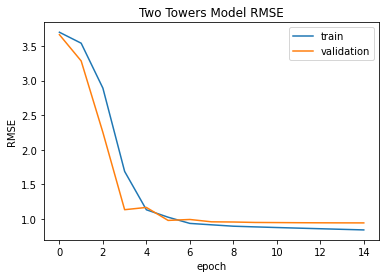



Best RMSE on validation : 0.9400


In [ ]:
def plot_history(history, model_name="Two Towers"):
    # summarize history for loss
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title(model_name + ' Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    print("\n\nBest RMSE on validation : {0:.4f}".format(min(history.history['val_root_mean_squared_error'])))

plot_history(history_TwoTowers, model_name="Two Towers")

**Overfitting does not occur blatantly for the first 15 epochs**





## Question 2 (15 pts)

Modifier le modèle Two Tower pour prendre en compte le biais utilisateur et item (film). La nouvelle formule de prédiction est donc :

$$pred_{i,j}= \sigma(b + biais_{u_i} + biais_{f_j} +E_{u_i}^TE_{f_j}) \times (M_{vote} - m_{vote}) + m_{vote}$$

<br>

Où $biais_{u_i} \in \mathbb{R}$ est le biais associé à l'utilisateur $u_i$ et $biais_{f_j} \in \mathbb{R}$ le biais associé au film $f_j$. <br>

$\sigma: x \mapsto \cfrac{1}{1+e^{-x}}$ est la fonction sigmoid, elle est déjà implémentée par TensorFlow : `tf.math.sigmoid`.<br>

Et, $M_{vote}, m_{vote}$ sont respectivement le maximum et le minimum des votes utilisateurs. Dans notre cas, $M_{vote}=5$ et $m_{vote}=1$.

### Description du modèle Two Tower avec Biais

Le modèle Keras correspondant est légèrement plus complexe. En plus des plongements d'utilisateurs et de films avec lesquelles nous avons déjà travaillé, le modèle ci-dessous approxime le biais utilisateur ($biais_{u_i}$) et le biais film ($biais_{f_j}$) en plongeant l'utilisateur et le film dans un espace unidimensionnel. Nous ajoutons ensuite les deux biais au produit scalaire représentant l'interaction utilisateur-film. La fonction d'activation sigmoïde normalise et ramène la prédiction à l'intervalle $[0,1]$, qui est ensuite ramenée à l'intervalle de vote original $[m_{vote}, M_{vote}]$.

### Définissez, initialisez, entrainez, affichez et interprétez les résultats du modèle Two Tower modifié. Y a-t-il surapprentissage ?

Dans cette question, il vous ai conseillé d'utiliser Adam avec un `learning_rate`$=0.005$.

In [ ]:
from tensorflow.python.framework.device import merge_device
#MovieLensModelWithBias Herite des attributs et des méthodes de MovieLensModel
class MovieLensModelWithBias(MovieLensModel):

  def __init__(self, embedding_dimension, id_uniques, films_unique, task, min_vote=1, max_vote=5):
    super().__init__(embedding_dimension, id_uniques, films_unique, task)

    self.min_vote, self.max_vote = min_vote, max_vote

    # Cette couche plonge dans un espace de dimension 1. Sa sortie est une constante qui représente le biais utilisateur.
    self.user_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1, 1)], name="User_Bias")

    self.movie_bias = movie_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 1)], name="Movie_Bias")

    self.user_dropout  = tf.keras.layers.Dropout(rate = 0.3, name="User_Dropout")
    self.movie_dropout = tf.keras.layers.Dropout(rate = 0.6, name="Movie_Dropout")


  def call(self, features):
    # TO DO 
    #le dropout doit etre applique sur les plongements utilisateurs et items
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    m                              =self.max_vote-self.min_vote
    #self.user_dropout=(user_embedding)
    mov1=self.movie_model(features['movie_title'])
    mov=self.movie_dropout(mov1)
    util1=self.user_model(features['user_id'])
    util=self.user_dropout(util1)
    input=self.pred([mov,util])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])    #input=MovieLensModel(embedding_dimension, id_uniques, films_unique, task,features)
    #input=self.pred(self.movie_dropout([self.movie_model(features['movie_title'])),
    #                                    self.user_dropout(self.user_model(features['user_id']))])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])
    #MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
    #movie_embedding,user_embedding =self.movie_model(features['movie_title']),self.user_model(features['user_id'])
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    #prediction=tf.math.sigmoid(input+self.user_dropout(user_embedding)+self.movie_dropout())*m+self.min_vote
    #m_v,u_v=self.movie_dropout(movie_embedding),self.user_dropout(user_embedding)
    prediction=tf.math.sigmoid(input)*m+self.min_vote
    return prediction

In [ ]:
#Initialisez le modèle et afficher ses couches (summary)

Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
Model_2(feature)
Model_2.summary()

Model: "movie_lens_model_with_bias"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 32)               30208     
                                                                 
 Movie_Embedding (Sequential  (8192, 32)               53280     
 )                                                               
                                                                 
 dot_1 (Dot)                 multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                        

In [ ]:
# Compilez le modèle en ajoutant l'optimiseur Adam
Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
    name='Adam'))

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
#Entrainez le modèle
history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)

Epoch 1/15
10/10 [==============================] - 4s 228ms/step - root_mean_squared_error: 1.2086 - loss: 1.4497 - regularization_loss: 0.0000e+00 - total_loss: 1.4497 - val_root_mean_squared_error: 1.1616 - val_loss: 1.3195 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.3195
Epoch 2/15
10/10 [==============================] - 3s 216ms/step - root_mean_squared_error: 1.1047 - loss: 1.2066 - regularization_loss: 0.0000e+00 - total_loss: 1.2066 - val_root_mean_squared_error: 1.0573 - val_loss: 1.1027 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.1027
Epoch 3/15
10/10 [==============================] - 3s 222ms/step - root_mean_squared_error: 0.9764 - loss: 0.9426 - regularization_loss: 0.0000e+00 - total_loss: 0.9426 - val_root_mean_squared_error: 0.9761 - val_loss: 0.9537 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.9537
Epoch 4/15
10/10 [==============================] - 3s 227ms/step - root_mean_squared_error: 0.8929 - loss: 0.7899 - regularizatio

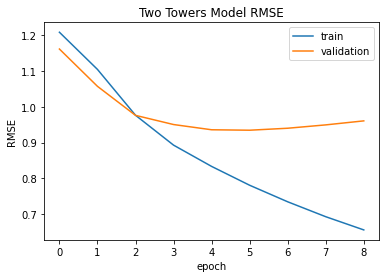



Best RMSE on validation : 0.9346


In [ ]:
#Affichez les résultats
def plot_history(history, model_name="Two Towers"):
    # summarize history for loss
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title(model_name + ' Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    print("\n\nBest RMSE on validation : {0:.4f}".format(min(history.history['val_root_mean_squared_error'])))

plot_history(history_TwoTowersBiais, model_name="Two Towers")

#### Observations

<u>Réponse</u> :<br>

Using item and user biases, the initial learning loss is 10 times lower than the previous case and it reaches 0.4184 at the 9th epoch. From the 7th epoch, the loss of validation begins to increase. Therefore, the early stop mechanism kicks in after 3 epochs and stops learning at the 9th epoch.

## Question 3 (20 pts)
Dans cette question, nous cherchons à améliorer le modèle Two Towers avec les biais de la question 2. <br> 

Voici quelques idées d'améliorations : 

### Question 3.1 (10 pts)

Améliorez les performances en changeant les hyperparamètres du modèle (<i>dropout, embedding_dim, learning rate, etc...</i>). Quelle est l'impact de ces hyperparamètres sur le surapprentissage (<i>overfitting</i>) ? **(10 pts)**

Tout d'abord on va faire lancer le modèele initial:

In [ ]:
# Compilez le modèle en ajoutant l'optimiseur Adam
embedding_dimension=32
Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
Model_2(feature)
Model_2.summary()
Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
    name='Adam'))

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 32)               30208     
                                                                 
 Movie_Embedding (Sequential  (8192, 32)               53280     
 )                                                               
                                                                 
 dot_2 (Dot)                 multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                      

Now let's try a sequential search method to get an idea of the possibilities of the optimal solution sets to minimize the RMSE

In [ ]:
#RECHER SEQUENTIEL DU EMBEDDINGS
embs=[5,10,15,20,25,30,32,35,40,45,50,55]
rmse_emb=[]
for i in embs:
  embedding_dimension=i
  Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_emb.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))


Model: "movie_lens_model_with_bias_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 5)                4720      
                                                                 
 Movie_Embedding (Sequential  (8192, 5)                8325      
 )                                                               
                                                                 
 dot_3 (Dot)                 multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                      

In [ ]:
embs,rmse_emb

([5, 10, 15, 20, 25, 30, 32, 35, 40, 45, 50, 55],
 [0.9376093745231628,
  0.9376261234283447,
  0.9343442320823669,
  0.9314554333686829,
  0.9352961182594299,
  0.934645414352417,
  0.9355686902999878,
  0.9348030090332031,
  0.934779167175293,
  0.9345945119857788,
  0.9295149445533752,
  0.9363574385643005])

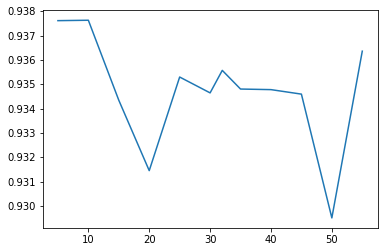

In [ ]:
plt.plot(embs,rmse_emb)

In [ ]:
#RECHERCHE SEQUENTIEL DU LEARNING RATE
lr=[0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1]
rmse_lr=[]
for i in lr:
  embedding_dimension=35
  Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_lr.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 35)               33040     
                                                                 
 Movie_Embedding (Sequential  (8192, 35)               58275     
 )                                                               
                                                                 
 dot_15 (Dot)                multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                     

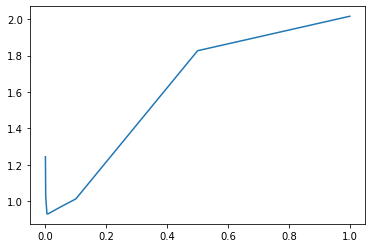

In [ ]:
plt.plot(lr,rmse_lr)

In [ ]:
lr,rmse_lr

([0, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
 [1.2448103427886963,
  1.2312766313552856,
  1.0264129638671875,
  0.9312834739685059,
  0.9327552914619446,
  0.9697420597076416,
  1.013698935508728,
  1.8265572786331177,
  2.0157580375671387])

In [ ]:
#RECHERCHE SEQUENTIEL DU LEARNING RATE (SUITE)
lr=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
rmse_lr=[]
for i in lr:
  embedding_dimension=35
  Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_lr.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 35)               33040     
                                                                 
 Movie_Embedding (Sequential  (8192, 35)               58275     
 )                                                               
                                                                 
 dot_24 (Dot)                multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                     

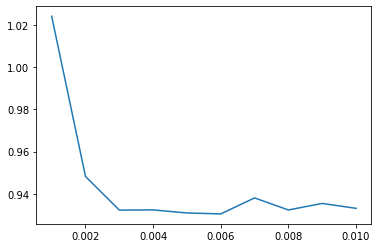

In [ ]:
plt.plot(lr,rmse_lr)

In [ ]:
lr,rmse_lr

([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
 [1.024247646331787,
  0.9482011795043945,
  0.9322245717048645,
  0.9323262572288513,
  0.9308702945709229,
  0.930418848991394,
  0.9380125403404236,
  0.9322926998138428,
  0.9353925585746765,
  0.9330660700798035])

In [ ]:
#RECHERCHE SEQUENTIEL DU LEARNING RATE (SUITE-SUITE)
lr=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
rmse_lr=[]
for i in lr:
  embedding_dimension=35
  Model_2 = MovieLensModelWithBias( embedding_dimension, id_uniques, films_unique, task)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_lr.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))
print(lr,rmse_lr)

Model: "movie_lens_model_with_bias_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 35)               33040     
                                                                 
 Movie_Embedding (Sequential  (8192, 35)               58275     
 )                                                               
                                                                 
 dot_34 (Dot)                multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                     

In [ ]:
#MovieLensModelWithBias Herite des attributs et des méthodes de MovieLensModel + dropour de user manipulation
#la seule modification par rapport a la fonction initial est que maintenant on se retrouves avec la variable dropout USER que l'on doit specifier
class MovieLensModelWithBias_user_dropout(MovieLensModel):

  def __init__(self, embedding_dimension, id_uniques, films_unique, task,drop_user, min_vote=1, max_vote=5):
    super().__init__(embedding_dimension, id_uniques, films_unique, task)

    self.min_vote, self.max_vote = min_vote, max_vote

    # Cette couche plonge dans un espace de dimension 1. Sa sortie est une constante qui représente le biais utilisateur.
    self.user_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1, 1)], name="User_Bias")

    self.movie_bias = movie_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 1)], name="Movie_Bias")

    self.user_dropout  = tf.keras.layers.Dropout(rate = drop_user, name="User_Dropout")
    self.movie_dropout = tf.keras.layers.Dropout(rate = 0.6, name="Movie_Dropout")


  def call(self, features):
    # TO DO 
    #le dropout doit etre applique sur les plongements utilisateurs et items
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    m                              =self.max_vote-self.min_vote
    #self.user_dropout=(user_embedding)
    mov1=self.movie_model(features['movie_title'])
    mov=self.movie_dropout(mov1)
    util1=self.user_model(features['user_id'])
    util=self.user_dropout(util1)
    input=self.pred([mov,util])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])    #input=MovieLensModel(embedding_dimension, id_uniques, films_unique, task,features)
    #input=self.pred(self.movie_dropout([self.movie_model(features['movie_title'])),
    #                                    self.user_dropout(self.user_model(features['user_id']))])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])
    #MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
    #movie_embedding,user_embedding =self.movie_model(features['movie_title']),self.user_model(features['user_id'])
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    #prediction=tf.math.sigmoid(input+self.user_dropout(user_embedding)+self.movie_dropout())*m+self.min_vote
    #m_v,u_v=self.movie_dropout(movie_embedding),self.user_dropout(user_embedding)
    prediction=tf.math.sigmoid(input)*m+self.min_vote
    return prediction

In [ ]:
#RECHERCHE SEQUENTIEL DU DROPOUT USER
dropout_user=[0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
rmse_do_user=[]
for i in dropout_user:
  embedding_dimension=35
  Model_2 = MovieLensModelWithBias_user_dropout( embedding_dimension, id_uniques, films_unique, task,i)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.006,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_do_user.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_user_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 35)               33040     
                                                                 
 Movie_Embedding (Sequential  (8192, 35)               58275     
 )                                                               
                                                                 
 dot_44 (Dot)                multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                           

In [ ]:
dropout_user,rmse_do_user,min(rmse_do_user)#==>0.7

([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 [0.9274783730506897,
  0.9385387301445007,
  0.9349596500396729,
  0.9320361614227295,
  0.9353268146514893,
  0.9324563145637512,
  0.9319868087768555,
  0.9357313513755798,
  0.9337607026100159,
  0.9276928901672363,
  0.9270792603492737,
  0.9334415793418884,
  0.9292749762535095],
 0.9270792603492737)

In [ ]:
#MovieLensModelWithBias Herite des attributs et des méthodes de MovieLensModel + dropour de movie manipulation
#la seule modification par rapport a la fonction initial est que maintenant on se retrouves avec la variable dropout MOVIE que l'on doit specifier

class MovieLensModelWithBias_mov_dropout(MovieLensModel):

  def __init__(self, embedding_dimension, id_uniques, films_unique, task,drop_movie, min_vote=1, max_vote=5):
    super().__init__(embedding_dimension, id_uniques, films_unique, task)

    self.min_vote, self.max_vote = min_vote, max_vote

    # Cette couche plonge dans un espace de dimension 1. Sa sortie est une constante qui représente le biais utilisateur.
    self.user_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1, 1)], name="User_Bias")

    self.movie_bias = movie_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 1)], name="Movie_Bias")

    self.user_dropout  = tf.keras.layers.Dropout(rate = 0.7, name="User_Dropout")
    self.movie_dropout = tf.keras.layers.Dropout(rate = drop_movie, name="Movie_Dropout")


  def call(self, features):
    # TO DO 
    #le dropout doit etre applique sur les plongements utilisateurs et items
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    m                              =self.max_vote-self.min_vote
    #self.user_dropout=(user_embedding)
    mov1=self.movie_model(features['movie_title'])
    mov=self.movie_dropout(mov1)
    util1=self.user_model(features['user_id'])
    util=self.user_dropout(util1)
    input=self.pred([mov,util])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])    #input=MovieLensModel(embedding_dimension, id_uniques, films_unique, task,features)
    #input=self.pred(self.movie_dropout([self.movie_model(features['movie_title'])),
    #                                    self.user_dropout(self.user_model(features['user_id']))])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])
    #MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
    #movie_embedding,user_embedding =self.movie_model(features['movie_title']),self.user_model(features['user_id'])
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    #prediction=tf.math.sigmoid(input+self.user_dropout(user_embedding)+self.movie_dropout())*m+self.min_vote
    #m_v,u_v=self.movie_dropout(movie_embedding),self.user_dropout(user_embedding)
    prediction=tf.math.sigmoid(input)*m+self.min_vote
    return prediction

In [ ]:
#RECHERCHE SEQUENTIEL DU DROPOUT ITEM
dropout_mov=[0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
rmse_do_mov=[]
for i in dropout_mov:
  embedding_dimension=35
  Model_2 = MovieLensModelWithBias_mov_dropout( embedding_dimension, id_uniques, films_unique, task,i)
  Model_2(feature)
  Model_2.summary()
  Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.006,
      name='Adam'))

  my_callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=3),
      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
  history_TwoTowersBiais=Model_2.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
  rmse_do_mov.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
  print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_mov_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 35)               33040     
                                                                 
 Movie_Embedding (Sequential  (8192, 35)               58275     
 )                                                               
                                                                 
 dot_232 (Dot)               multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                            

In [ ]:
dropout_mov,rmse_do_mov

([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 [0.9323354363441467,
  0.9334900379180908,
  0.9278793931007385,
  0.9342823624610901,
  0.9314990043640137,
  0.9305980205535889,
  0.9321995973587036,
  0.9317973852157593,
  0.9304296374320984,
  0.9340676665306091,
  0.9322767853736877,
  0.932768702507019,
  0.9327555298805237])

In [ ]:
min(rmse_do_mov)

0.9278793931007385

Grid-search/Facon combinatoire de recherche de hyper-parametre

In [ ]:
#MovieLensModelWithBias Herite des attributs et des méthodes de MovieLensModel + dropout de user,movie manipulation
#la seule modification par rapport a la fonction initial est que maintenant on se retrouves avec la variable dropout USER ET ITEM que l'on doit specifier

class MovieLensModelWithBias_user_movie_dropout(MovieLensModel):

  def __init__(self, embedding_dimension, id_uniques, films_unique, task,drop_user,drop_movie, min_vote=1, max_vote=5):
    super().__init__(embedding_dimension, id_uniques, films_unique, task)

    self.min_vote, self.max_vote = min_vote, max_vote

    # Cette couche plonge dans un espace de dimension 1. Sa sortie est une constante qui représente le biais utilisateur.
    self.user_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1, 1)], name="User_Bias")

    self.movie_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 1)], name="Movie_Bias")

    self.user_dropout  = tf.keras.layers.Dropout(rate = drop_user, name="User_Dropout")
    self.movie_dropout = tf.keras.layers.Dropout(rate = drop_movie, name="Movie_Dropout")
  def call(self, features):
    # TO DO 
    #le dropout doit etre applique sur les plongements utilisateurs et items
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    m                              =self.max_vote-self.min_vote
    #self.user_dropout=(user_embedding)
    mov1=self.movie_model(features['movie_title'])
    mov=self.movie_dropout(mov1)
    util1=self.user_model(features['user_id'])
    util=self.user_dropout(util1)
    input=self.pred([mov,util])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])    #input=MovieLensModel(embedding_dimension, id_uniques, films_unique, task,features)
    #input=self.pred(self.movie_dropout([self.movie_model(features['movie_title'])),
    #                                    self.user_dropout(self.user_model(features['user_id']))])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])
    #MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
    #movie_embedding,user_embedding =self.movie_model(features['movie_title']),self.user_model(features['user_id'])
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    #prediction=tf.math.sigmoid(input+self.user_dropout(user_embedding)+self.movie_dropout())*m+self.min_vote
    #m_v,u_v=self.movie_dropout(movie_embedding),self.user_dropout(user_embedding)
    prediction=tf.math.sigmoid(input)*m+self.min_vote
    return prediction

I advise not to roll the sequel since this will take much longer. Below you will find our search for optimal hyperparameters for question 3.1 by a sequential method. We will rather seek to optimize a variable and once we have found the optimal value of it, we will continue with this variable to optimize the rest. 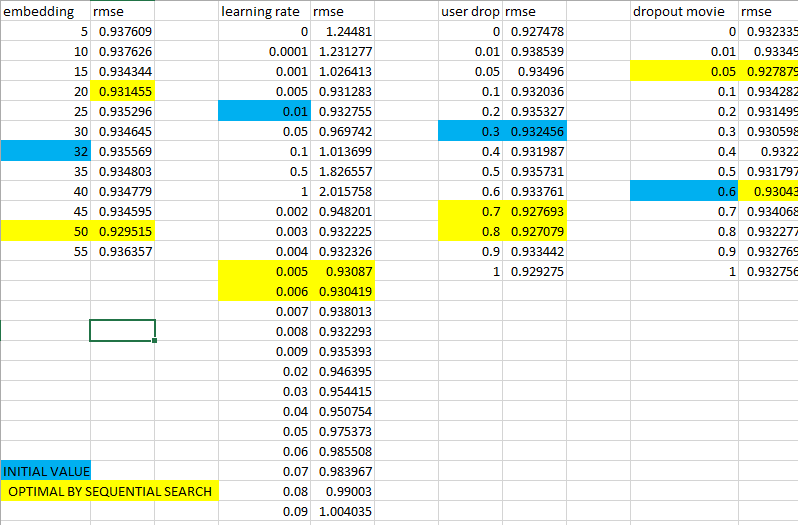

But in reality, you have to do a grid-search based on the combinations of the possibilities of the different hyperparameters. On the other hand, even with a very powerful GPU, this takes a lot of time, so we decided to continue with the top-2 values obtained for each of the hyper-parameters by the sequential method and the initial value of the model.

***At your own risk further research (if you decide to roll it) can take a long time. I advise you to look at the results without running the code.***

In [ ]:
#ce code prend du temps a rouler
#RECHERCHE GRID D'OPTIMISATION DES HYPER-PARAMETRES COMBINÉES.
dropout_mov=[0.05,0.6]
lr=[0.01,0.005,0.006]
dropout_user=[0.3,0.7,0.8]
embs=[20,32,50]
best_emb=best_lr=best_dropout_u=best_dropout_m=0
best_rmse=1000000000000000
rmse=[]
best_model=None
best_history=None
for embedding in embs:
  for learning in lr:
    for user_dropout in dropout_user:
      for movie_dropout in dropout_mov:
        embedding_dimension=embedding
        Model_best = MovieLensModelWithBias_user_movie_dropout( embedding_dimension, id_uniques, films_unique, task,user_dropout,movie_dropout)
        Model_best(feature)
        Model_best.summary()
        Model_best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning,
            name='Adam'))

        my_callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=3),
            tf.keras.callbacks.TensorBoard(log_dir='./logs'),
        ]
        history_TwoTowersBiais=Model_best.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)
        rmse.append(min(history_TwoTowersBiais.history['val_root_mean_squared_error']))
        print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais.history['val_root_mean_squared_error'])))
        if min(history_TwoTowersBiais.history['val_root_mean_squared_error'])<best_rmse:
          best_rmse=min(history_TwoTowersBiais.history['val_root_mean_squared_error'])
          best_emb=embedding
          best_lr=learning
          best_dropout_u=user_dropout
          best_dropout_m=movie_dropout
          best_model=Model_best
          best_history=history_TwoTowersBiais



Model: "movie_lens_model_with_bias_user_movie_dropout_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 20)               18880     
                                                                 
 Movie_Embedding (Sequential  (8192, 20)               33300     
 )                                                               
                                                                 
 dot_178 (Dot)               multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                 

In [ ]:
print(best_rmse)
print(best_emb)
print(best_lr)
print(best_dropout_u)
print(best_dropout_m)

0.9295708537101746
50
0.006
0.8
0.05


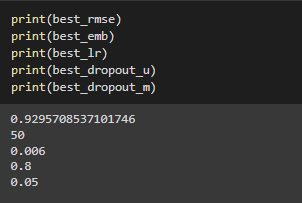

Notez que ces variables peuvent dépendrent mais en roulant ceci 3 fois, ces mêmes réponses s'y sont retrouvés 2/3 des tentatives. Ainsi, on les jugent comme étant optimal.

In [ ]:
best_history.history['val_root_mean_squared_error']

[1.1935774087905884,
 1.1250250339508057,
 1.029265284538269,
 0.975508987903595,
 0.9541665315628052,
 0.9388332366943359,
 0.9317066669464111,
 0.9295708537101746,
 0.9308687448501587,
 0.9347319006919861,
 0.9404085278511047]

Finally we obtain an optimal RMSE of 0.9295708537101746 when we do a grid search (combinatorial) among the sets of hyper-parameters selected by sequential method. In fact, we wanted to try all the combinations with a grid-search but the search would take much longer to do. After a search that lasted us more than 1 day, we decided to stop to proceed in this way. Although by rolling the result could be different, we obtained this RMSE for the following variable values:

embedding=50

learning rate= 0.06

dropout user=0.8

dropout movie=0.05

### Question 3.2 (10 pts)

Commencez l'entrainement du modèle avec des plongements pré-entrainés (pretrained embeddings) obtenus aux questions précédentes. **(10 pts)**

In [ ]:
model_3_2=best_model
model_3_2

In [ ]:
best_model

In [ ]:
#embedding_dimension=50
#Model_2 = MovieLensModelWithBias_user_movie_dropout( embedding_dimension, id_uniques, films_unique, task,0.3,0.05)
#Model_2(feature)
#Model_2.summary()
#Model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.06,
#    name='Adam'))
rmse_3_2=None
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history_TwoTowersBiais_3_2=model_3_2.fit(train, epochs=10, validation_data=valid, callbacks=my_callbacks)
rmse_3_2=min(history_TwoTowersBiais_3_2.history['val_root_mean_squared_error'])
print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais_3_2.history['val_root_mean_squared_error'])))


Epoch 1/10
10/10 [==============================] - 4s 246ms/step - root_mean_squared_error: 0.3151 - loss: 0.0964 - regularization_loss: 0.0000e+00 - total_loss: 0.0964 - val_root_mean_squared_error: 1.0910 - val_loss: 1.1949 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.1949
Epoch 2/10
10/10 [==============================] - 4s 236ms/step - root_mean_squared_error: 0.3109 - loss: 0.0938 - regularization_loss: 0.0000e+00 - total_loss: 0.0938 - val_root_mean_squared_error: 1.0950 - val_loss: 1.2039 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.2039
Epoch 3/10
10/10 [==============================] - 3s 225ms/step - root_mean_squared_error: 0.3069 - loss: 0.0914 - regularization_loss: 0.0000e+00 - total_loss: 0.0914 - val_root_mean_squared_error: 1.0988 - val_loss: 1.2127 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.2127
Epoch 4/10
10/10 [==============================] - 4s 235ms/step - root_mean_squared_error: 0.3030 - loss: 0.0891 - regularizatio

In [ ]:
rmse_3_2

[0.9403561353683472]

##### Explanations:
  We are now left with a larger RMSE than the initial one in question 3.1. But this is caused by overfitting. In fact, the purpose of using early stopping in question 3.1 allows us to regularize the model in order to avoid overtraining. But by taking this same model and continuing to train again and again, we end up over-fitting the model to the training set, which causes a decrease in the validation set. This phenomenon can be observed directly by observing the validation rmse which is printed and also the epochs which shows us that the variable "root_mean_squared_error" is indeed decreasing compared to question 3.1.

### Bonus (10 pts)

Prenez en compte les `timestamps`, ou développez d'autres idées que vous détaillerez.

**In this part (bonus) we are feeding the timestamp information to the two tower model (3 towers). This model resembles the model at we can find at step 3.1 bnut we add this timstamp information and a time biais.**

In [ ]:
#Titres des films
timestamps    = votes.map(lambda x: x["timestamp"]).batch(1000000)# On prend tous les films d'un coup
timestamps_unique    = np.unique(np.concatenate(list(timestamps)))
#timestamps_unique = timestamps_unique.shape[0]
timestamps_unique,timestamps

(array([b'874724710', b'874724727', b'874724754', ..., b'893286603',
        b'893286637', b'893286638'], dtype=object),
 <BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>)

In [ ]:
#MovieLensModelWithBias Herite des attributs et des méthodes de MovieLensModel
class MovieLensModelWithBias_times(MovieLensModel):

  def __init__(self, embedding_dimension, id_uniques,timestamp_unique, films_unique, task, min_vote=1, max_vote=5):
    super().__init__(embedding_dimension, id_uniques, films_unique, task)

    self.min_vote, self.max_vote = min_vote, max_vote

    # Cette couche plonge dans un espace de dimension 1. Sa sortie est une constante qui représente le biais utilisateur.
    self.user_bias = user_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=id_uniques, mask_token=None),
                                    tf.keras.layers.Embedding(len(id_uniques) + 1, 1)], name="User_Bias")

    self.movie_bias = movie_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=films_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(films_unique) + 1, 1)], name="Movie_Bias")
    
    self.time_biais = time_model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=timestamp_unique, mask_token=None),
                                    tf.keras.layers.Embedding(len(timestamp_unique) + 1, 1)], name="Time_Bias")
    
    self.user_dropout  = tf.keras.layers.Dropout(rate = 0.3, name="User_Dropout")
    self.movie_dropout = tf.keras.layers.Dropout(rate = 0.6, name="Movie_Dropout")
    self.time_dropout = tf.keras.layers.Dropout(rate = 0.6, name="Time_Dropout")

  def call(self, features):
    # TO DO 
    #le dropout doit etre applique sur les plongements utilisateurs et items
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    m                              =self.max_vote-self.min_vote
    #self.user_dropout=(user_embedding)
    mov1=self.movie_model(features['movie_title'])
    mov=self.movie_dropout(mov1)
    util1=self.user_model(features['user_id'])
    util=self.user_dropout(util1)
    time1=self.user_model(features['timestamp'])
    time=self.user_dropout(time1)

    input=self.pred([mov,util])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])+self.time_biais(features['timestamp'])    #input=MovieLensModel(embedding_dimension, id_uniques, films_unique, task,features)
    #input=self.pred(self.movie_dropout([self.movie_model(features['movie_title'])),
    #                                    self.user_dropout(self.user_model(features['user_id']))])+self.user_bias(features['user_id'])+self.movie_bias(features['movie_title'])
    #MovieLensModel(embedding_dimension, id_uniques, films_unique, task)
    #movie_embedding,user_embedding =self.movie_model(features['movie_title']),self.user_model(features['user_id'])
    #user_embedding,movie_embedding =super().user_model(features["user_id"]), super().movie_model(features["movie_title"])
    #prediction=tf.math.sigmoid(input+self.user_dropout(user_embedding)+self.movie_dropout())*m+self.min_vote
    #m_v,u_v=self.movie_dropout(movie_embedding),self.user_dropout(user_embedding)
    prediction=tf.math.sigmoid(input)*m+self.min_vote
    return prediction

In [ ]:
embedding_dimension=32
Model_3_3 = MovieLensModelWithBias_times( embedding_dimension, id_uniques,timestamps_unique, films_unique, task,)
Model_3_3(feature)
Model_3_3.summary()
Model_3_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.06,
   name='Adam'))
rmse_3_4=None
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history_TwoTowersBiais_3_3=model_3_2.fit(train, epochs=10, validation_data=valid, callbacks=my_callbacks)
rmse_3_4=min(history_TwoTowersBiais_3_3.history['val_root_mean_squared_error'])
print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais_3_3.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_times_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 32)               30208     
                                                                 
 Movie_Embedding (Sequential  (8192, 32)               53280     
 )                                                               
                                                                 
 dot_252 (Dot)               multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                

In [ ]:
embedding_dimension=50
Model_3_3 = MovieLensModelWithBias_times( embedding_dimension, id_uniques,timestamps_unique, films_unique, task,)
Model_3_3(feature)
Model_3_3.summary()
Model_3_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.06,
   name='Adam'))
rmse_3_4=None
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history_TwoTowersBiais_3_3=model_3_2.fit(train, epochs=10, validation_data=valid, callbacks=my_callbacks)
rmse_3_4=min(history_TwoTowersBiais_3_3.history['val_root_mean_squared_error'])
print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_TwoTowersBiais_3_3.history['val_root_mean_squared_error'])))

Model: "movie_lens_model_with_bias_times_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 User_Embedding (Sequential)  (8192, 50)               47200     
                                                                 
 Movie_Embedding (Sequential  (8192, 50)               83250     
 )                                                               
                                                                 
 dot_253 (Dot)               multiple                  0         
                                                                 
 perte (Ranking)             multiple                  0         
                                                                 
 User_Bias (Sequential)      (8192, 1)                 944       
                                                                 
 Movie_Bias (Sequential)     (8192, 1)                 1665      
                                

#### Conclusion for timestamp: 
The RMSE is worse than the other ones, but that can be explained very clearly. As we can see the adding of the timestamp feature into the input of this architecture, we get a training RMSE of 0.2572 minimum. This is a much lower RMSE than the ones we can find earlier. Therefore, we can interpret this as adding this extra information is overfitting the model to the training. This is why we end up getting a much higher validation RMSE.

## Question 4 (50 points)

Maintenant que vous vous êtes familiarisés avec les librairies de `Tensorflow`, attaquons-nous à l'état de l'art. En utilisant des mots-clés comme `Deep Learning`, `Recommender Systems`, et `MovieLens`, faites une brève revue de l'état de l'art. Il est impératif que vous <b>citiez vos [sources](https://ulyngs.github.io/oxforddown/cites-and-refs.html)</b>.

Ensuite, inspirez-vous de vos recherches pour proposer une approche plus performante que celle vue au-dessus. Pour cette question, il est recommandé de fournir un rapport séparé pour votre état de l'art et l'explication de votre démarche en format PDF. Mais, si vous ne souhaitez pas rédiger de rapport, vous pouvez rédiger dans les cellules textes ci-dessous.


<br>

Cette question vous laisse beaucoup de liberté dans vos réponses, vous pouvez utiliser n'importe quelle bibliothèque Python contrairement aux autres questions. Néanmoins, vous êtes quand même **soumis à des contraintes** :
- Vous devez utiliser uniquement les données `MovieLens 100k`
- **Si** vous **n**'avez **pas** besoin de features supplémentaires de `Movielens 100k` que celle extraite dans la **question 1.1**, utilisez l'ensemble d'entrainement (`train`) et de validation (`valid`) créée à la question 1.5
- Votre modèle doit se baser sur des réseaux de neurones
- Votre modèle doit être en tensorflow
- Vous **ne** pouvez **pas** **entrainer** vos modèles sur les données de **validation** 
- Citez obligatoirement vos sources !


<br>

Une approche possible qu'on vous propose est de **réimplémenter** la méthode décrite dans le papier [Scalable deep learning-based recommendation systems](https://www.sciencedirect.com/science/article/pii/S2405959518302029) de H. Lee et al.<br>

Pour cela il faut :
1. Créer la matrice utilisateur-item
2. Implémenter leur preprocessing sur la matrice utilisateur-item
3. Implémenter le modèle décrit pour `MovieLens 100k`
4. Entrainer le modèle
5. Comparer les résultats obtenus en calculant la RMSE sur l'ensemble de validation par rapport à ceux obtenus par les méthodes précédentes

<br><br>


<big><b><center>Les 3 groupes ayant les meilleurs RMSE sur l'ensemble de validation auront 10 points de bonus.</center></b></big>

<br>
<br>
<br>


**Qualités attendues du travail**, vous serez noté selon :
- L'originalité de votre démarche
- La cohérence de votre démarche avec l'état de l'art rédigé
- Les résultats empiriques (**RMSE**) sur l'ensemble de validation, notamment est-ce qu'elle performe mieux que les méthodes précédentes de manière consistante ?

#### État de l'art (15 points)



<u>Réponse :</u><br>
<i>In this part we followed the method presented at  Scalable deep learning-based recommendation systems de H. Lee et al which caused to have a much better performance comparing to the original method.   

First we divide the data to training and validation with 80-20 ratio. In the training data we convert the data related to validation to NaN. Then training data converted to user-item matrix with NaN values for missing data and also validation data. Then we compute line and column mean of this training user-item matrix and create a mean matrix of 943*1682 by using mean of two values for each entry. The difference of original user-item matrix and mean matrix will give a centered matrix (R_norm in the code).    

Using this centered matrix Then we create User Normalized Matrix and Item Normalized Matrix from which is simply normalization of data based on total number of user who voted for an item and also number of existing votes for each item.  In this step we substitue NaN value with 0.  
User Normalized Matrix and Item Normalize Matrix will be concatenated and feed into our Neural Network (using Prep function).  
Our designed Neural Network architecture is the same as original paper which is 3 hidden layer of 256 units each with Batch Normalization between layers. Input layer has (943+1682=2625) units. In the original paper it is not specified which function is used for activation. However we found that using Relu for first hidden layer and tanh for two next layers will give the best results.  
Also in the original paper it is recommended to use 128 batch size but we found that using 20 batch size gives more stable and better loss reduction.

The output layer of neurakl network is of size 5 which uses softmax function. the output of softmax will gives us the probability for 5 ratings. Using these probabilities we find expected voting (sum of probabilities time ratings) which is our prediction of rating by that user for the item.
One other feature that we add to our neural network is Learning Rate scheduling, after epoch 5 we decrease LR exponentially by factor of exp(-0.1), our investigation showed that it reduces RMSE more than 1%.
The results shows that using this method we reach RMSE=0.836 which is much better than original paper that reach 0.907. Also this method gives way better results than out two-tower method which we reach RMSE of 0.93.  
 </i>

#### Code et démarche (35 points)

##### Démarche et raisonnement :

<ul>
  <li>Citez vos sources qui vous aider à produire votre solution. En particulier, mentionnez la source du code que vous avez pris et modifié s'il y a lieu</li>
  <li>Expliquez votre démarche et votre raisonnement.</li>
</ul>


<u>Réponse :</u><br>
<i>For this part we proceeded by making a reproduction of the model proposed in the article mentioned above using the tensorflow and keras infrastructure that we learned in part 2 and 3 of this same lab.

In fact, we have an architecture with 3 layers and with normalization layers. The architecture in detail has been explained in the "State of the art" section.</i>

##### Code

Faites en sorte que le code soit lisible et facilement interprétable.

In [ ]:
#create complete 
user_rating = votes.map(lambda x: x["user_rating"]).batch(1000000)
id_utilisateurs = votes.map(lambda x: x["user_id"]).batch(1000000)
id_movie    = votes.map(lambda x: x["movie_id"]).batch(1000000)

user_rating=np.concatenate(list(user_rating))
movie_list=np.concatenate(list(id_movie))
user_list=np.concatenate(list(id_utilisateurs))

df_votes = pd.DataFrame({'id_movie':movie_list, 'id_utilisateurs':user_list, 'user_rating':user_rating})


In [ ]:
#sample 20 percent of votes as validation dataframe
df_valid = df_votes.sample(frac = 0.2,random_state=1)

In [ ]:
#create training dataframe
df_train=df_votes.copy() 
#replacing the ratings that chosen for validation with NaN in the training dataset 
df_train.loc[df_valid.index, 'user_rating']=np.NaN  

#create user-item matrix
train_matrix=df_train.pivot(index="id_utilisateurs", columns="id_movie", values="user_rating")


In [ ]:
#find columns mean
column_mean=train_matrix.mean(axis=0)
#finding rows mean
row_mean=train_matrix.mean(axis=1)
#finding outer mean of row and column mean
mean_df=pd.DataFrame((np.add.outer(np.array(row_mean),np.array(column_mean)))/2)
#fill remaining NaN values in combined mean by row mean
mean_df.T.fillna(df_train.mean(axis=1), inplace=True)
#adjust index of mean df
mean_df.index=train_matrix.index
#adjust column name of mean df
mean_df.columns=train_matrix.columns
# create centered data
R_norm=train_matrix-mean_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#create user and item normalized matrix and replace nan with 0
user_normalized_matrix=(R_norm*len(R_norm.columns)).div(R_norm.count(axis=1), axis=0).fillna(0)

item_normalized_matrix=(R_norm*len(R_norm)).div(R_norm.count(axis=0), axis=1).fillna(0)

In [ ]:
#define RMSSE as metric and MSE as loss 
task = tfrs.tasks.Ranking(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
    name="perte"
)

In [ ]:
# concatenate user and item normalized matrix
def prep(feature,user_normalized_matrix=user_normalized_matrix,item_normalized_matrix=item_normalized_matrix):
  x=np.array(feature['user_id'])
  user_norm=tf.convert_to_tensor(user_normalized_matrix.loc[x])
  y=np.array(feature['movie_id'])
  item_norm=tf.convert_to_tensor(item_normalized_matrix[y].T)

  input =tf.concat([user_norm, item_norm], 1)

  return input

In [ ]:
#define neural network with 3 hidden layer of 256 units
tf.config.run_functions_eagerly(True)
class MovieLensModel_scalable(tfrs.models.Model):
  
  def __init__(self,task):
    #super().__init__()
    super(MovieLensModel_scalable, self).__init__()


    self.input_size=2625

    self.ratings=tf.constant([1.0,2.0,3.0,4.0,5.0])

    self.task: tf.keras.layers.Layer = task

    #input layer
    self.input_layer = tf.keras.Input( self.input_size)
    #batch normalization of input layer
    self.norm_0=BatchNormalization(beta_initializer="zeros", gamma_initializer="ones")

    #first hidden layer
    self.layer_1 = Dense(256, activation="relu")
    #batch normalization of first hidden layer
    self.norm_1=BatchNormalization(beta_initializer="zeros", gamma_initializer="ones")

    #2nd hidden layer
    self.layer_2 = Dense(256, activation="tanh")
    #batch normalization of 2nd hidden layer
    self.norm_2=BatchNormalization(beta_initializer="zeros", gamma_initializer="ones")

    #3rd hidden layer
    self.layer_3 = Dense(256, activation="tanh")
    #batch normalization of 3rd hidden layer
    self.norm_3=BatchNormalization(beta_initializer="zeros", gamma_initializer="ones")

    #outputlayer
    self.layer_out = Dense(5, activation="softmax")


  def call(self, feature):
    
    # concatenating item and user by prep function
    input=prep(feature)

    #importing input into hidden layers
    x=self.norm_0(input)
    x=self.layer_1 (x)
    x=self.norm_1(x)
    x=self.layer_2 (x)
    x=self.norm_2(x)
    x=self.layer_3 (x)
    x=self.norm_3(x)
    x=self.layer_out(x)

    #calculating expected vote
    prediction = tf.einsum('br,r->b', x, self.ratings)

    return prediction

  
  def compute_loss(self, feature, training=False) -> tf.Tensor:
    
    return self.task(labels=feature["user_rating"], predictions=self.call(feature))

In [ ]:
N          = len(votes)
batch_size = 20 
prop       = 0.8
train_len  = tf.cast(N * prop, dtype=tf.int64)
valid_len   = tf.cast(N - train_len, dtype=tf.int64)


tf.random.set_seed(73)
train = votes.take(train_len).shuffle(train_len, seed=73, reshuffle_each_iteration=False).batch(batch_size)
valid = votes.skip(train_len).take(valid_len).shuffle(valid_len, seed=73, reshuffle_each_iteration=False).batch(batch_size)

In [ ]:
# On tire un exemple pour construire le graphe du modèle
feature = next(iter(train))

In [ ]:
Model_4 = MovieLensModel_scalable(task)
Model_4(feature)
Model_4.summary()

Model: "movie_lens_model_scalable_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 perte (Ranking)             multiple                  0         
                                                                 
 batch_normalization_20 (Bat  multiple                 10500     
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            multiple                  672256    
                                                                 
 batch_normalization_21 (Bat  multiple                 1024      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            multiple                  65792     
                                                                 
 batch_normalization_22 (Bat  multiple 

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch<5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

Model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,
    name='SGD'))

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]



In [ ]:
history_scalable = Model_4.fit(train, epochs=15, validation_data=valid, callbacks=my_callbacks)

Epoch 1/15
4000/4000 [==============================] - 94s 23ms/step - root_mean_squared_error: 0.9446 - loss: 0.8922 - regularization_loss: 0.0000e+00 - total_loss: 0.8922 - val_root_mean_squared_error: 0.9136 - val_loss: 0.8395 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.8395 - lr: 0.0100
Epoch 2/15
4000/4000 [==============================] - 94s 23ms/step - root_mean_squared_error: 0.8588 - loss: 0.7376 - regularization_loss: 0.0000e+00 - total_loss: 0.7376 - val_root_mean_squared_error: 0.8925 - val_loss: 0.8896 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.8896 - lr: 0.0100
Epoch 3/15
4000/4000 [==============================] - 94s 23ms/step - root_mean_squared_error: 0.8038 - loss: 0.6461 - regularization_loss: 0.0000e+00 - total_loss: 0.6461 - val_root_mean_squared_error: 0.8756 - val_loss: 0.8462 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.8462 - lr: 0.0100
Epoch 4/15
4000/4000 [==============================] - 94s 23ms/step - root_me

In [ ]:
round(Model_4.optimizer.lr.numpy(), 5)

0.0067

In [ ]:
print('Le meilleur RMSE obtenu est :',min(history_scalable.history['val_root_mean_squared_error']))

Le meilleur RMSE obtenu est : 0.8355672955513


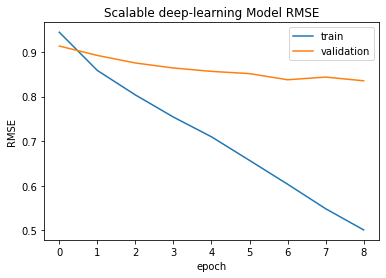



Best RMSE on validation : 0.8356


In [ ]:
#Affichez les résultats
def plot_history(history_scalable, model_name="Scalable deep-learning"):
    # summarize history for loss
    plt.plot(history_scalable.history['root_mean_squared_error'])
    plt.plot(history_scalable.history['val_root_mean_squared_error'])
    plt.title(model_name + ' Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    print("\n\nBest RMSE on validation : {0:.4f}".format(min(history_scalable.history['val_root_mean_squared_error'])))

plot_history(history_scalable, model_name="Scalable deep-learning")